In [1]:
import numpy as np

In [2]:
import pandas as pd

第一部分

1.1

In [3]:
M=np.matrix([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])

In [4]:
a=np.matrix([1,1,0])

In [5]:
b=np.matrix([-1,2,5]).reshape((3,1))

In [6]:
print(M.shape)
print(a.shape)
print(b.shape)

(4, 3)
(1, 3)
(3, 1)


1.2

In [7]:
def dot_product(a,b):
    m1,n1=a.shape
    m2,n2=b.shape
    result=np.zeros((m1,n2))
    if m1==1and n1==1:
        result=a*b
        return result
    if m2==1and n2==1:
        result=b*a
        return result
    else:
        for i in range(m1):
            for j in range(n2):
                result[i,j]=a[i].dot((b.T[j]).T)
    return result

In [8]:
dot_product(a,b)

array([[1.]])

1.3 要实现的等式应该是$(a b)Ma^T$

In [9]:
M_2 = np.array(range(4)).reshape((2,2))
a_2 = np.array([[1,1]])
b_2 = np.array([[10, 10]]).T
print(M_2.shape)
print(a_2.shape)
print(b_2.shape)

(2, 2)
(1, 2)
(2, 1)


In [10]:
def complicated_matrix_function(M,a,b):
    first=dot_product(a,b)
    print(first)
    mid=dot_product(first,M)
    print(mid)
    result=dot_product(mid,a.T)
    print(result)
    return result

In [11]:
complicated_matrix_function(M=M_2, a=a_2, b=b_2) 

[[20.]]
[[ 0. 20.]
 [40. 60.]]
[[ 20.]
 [100.]]


array([[ 20.],
       [100.]])

1.4  实现svd分解

In [12]:
import numpy.linalg as nl

In [13]:
M = np.array([[1,2,3],[4,5,6],[7,8,9]])

1.4.1  这是个错误的针对矩阵M的svd分解过程，但是结果很好，有点类似于截断pcb

In [104]:
def pcb(M):
    eigvalue,eigvector=nl.eig((M.T).dot(M))
    V=eigvector
    sigma=np.diag(np.sqrt(eigvalue))
    u1=M.dot(V[:,0])/sigma[0][0]
    u1=u1/nl.norm(u1)
    u2=M.dot(V[:,1])/sigma[1][1]
    u2=u2/nl.norm(u2)
    u3=M.dot(V[:,2])/sigma[2][2]
    u3=u3/nl.norm(u3)
    U=(np.array([u1,u2,u3])).T
    return U,sigma,V

In [105]:
U,sigma,V=pcb(M)

In [106]:
U

array([[-0.21483724,  0.88723069,  0.87798202],
       [-0.52058739,  0.24964395,  0.27247718],
       [-0.82633754, -0.38794278, -0.39357815]])

In [107]:
U.dot(sigma).dot(V.T)     ################精度极高.但是原理上不对

array([[1.00000003, 1.99999994, 3.00000003],
       [4.00000001, 4.99999998, 6.00000001],
       [6.99999999, 8.00000003, 8.99999999]])

1.4.2 很显然上面的做法是错的，因为浮点数误差造成了0特征值没有被拿出来处理，需要求一个零空间，没想出来怎么做，先封装这个函数

In [117]:
M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [118]:
def fake_SVD(M):
    eigvalue,eigvector=nl.eig((M.T).dot(M))
    m=M.shape[0]
    V=eigvector
    sigma=np.diag(np.sqrt(eigvalue))
    n=sigma.shape[0]
    U=np.zeros((m,n))
    for i in range(len(sigma)):
        u=M.dot(V[:,i])/sigma[i][i]
        u=u/nl.norm(u)
        U[i,:]=u
    return U.T,sigma,V

In [119]:
U,sigma,V=fake_SVD(M=M)

In [120]:
U

array([[-0.21483724,  0.88723069,  0.87798202],
       [-0.52058739,  0.24964395,  0.27247718],
       [-0.82633754, -0.38794278, -0.39357815]])

In [121]:
U.dot(sigma).dot(V.T) 

array([[1.00000003, 1.99999994, 3.00000003],
       [4.00000001, 4.99999998, 6.00000001],
       [6.99999999, 8.00000003, 8.99999999]])

In [122]:
def get_singular_values(M):
    eigvalue,eigvector=nl.eig((M.T).dot(M))
    return np.sqrt(eigvalue)

In [116]:
get_singular_values(M=M)

array([1.68481034e+01, 1.06836951e+00, 8.53406751e-08])

1.5实现特征值分解，特征值分解是针对方阵的特殊分解，总觉得是奇异值分解的一种

In [124]:
M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [138]:
def fake_EGD(M):
    eigvalue,eigvector=nl.eig(M)
    lamda=np.diag(eigvalue)
    return eigvector,lamda,nl.inv(eigvector)

In [140]:
w,v,m=fake_EGD(M)

In [144]:
w.dot(v).dot(m)                 ################成功分解，剩下步骤就省略了，和SVD一样

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

第二部分

In [164]:
import matplotlib.pyplot as plt

In [152]:
path=r"C:\Users\王飘鸿\Desktop\cv\cs131\大作业\hw0_release"

In [153]:
img1=path+"/image1.jpg"
img2=path+"/image2.jpg"

In [160]:
def display(img):
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

2.1 实现load函数

In [276]:
import skimage.io  as so
import skimage as si
import skimage.color as sc

In [211]:
#####很奇怪一定要除以256，否则会失真

In [218]:
def load(path):
    data=so.imread(path)/256
    print(data)
    display(data)

2.2实现dim_image()函数

In [232]:
img_data1=so.imread(img1)/256
img_data2=so.imread(img2)/256

In [220]:
def dim_image(image_data):
    new_image_data=0.5*image_data*image_data
    return  new_image_data

In [222]:
new_img_data1=dim_image(img_data1)

对比一下

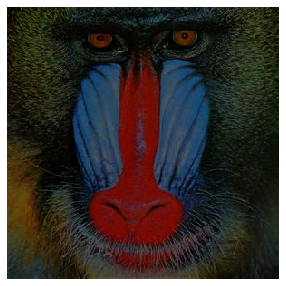

In [224]:
display(new_img_data1)   

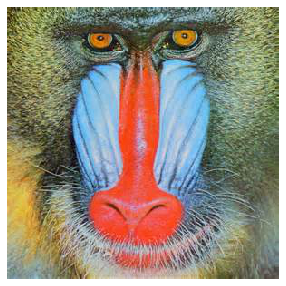

In [226]:
display(img_data1)

2.3 实现convert_to_grey_scale函数,这不是灰色的图片啊，可是我在库里找了半天就这个亮度转换函数

In [243]:
def convert_to_grey_scale(orign_data):
    grey_data=si.color.rgb2grey(orign_data)
    display(grey_data)
    return grey_data

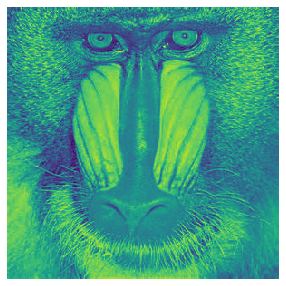

In [244]:
grey_img_data1=convert_to_grey_scale(img_data1)

2.4实现rgb_exclusion()函数,去除照片中某一种颜色

In [271]:
def rgb_exclusion(orign_data,exclude):
    excluded_data=orign_data.copy()
    if exclude=="R":
        excluded_data[:,:,0]=0
    if exclude=="G":
        excluded_data[:,:,1]=0
    if exclude=="B":
        excluded_data[:,:,2]=0
    return excluded_data

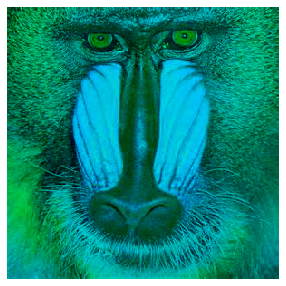

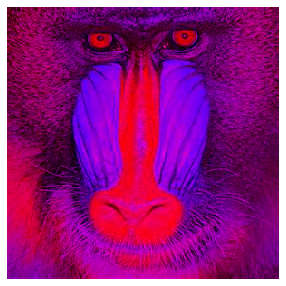

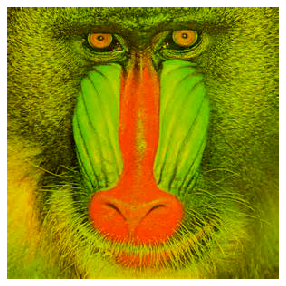

In [315]:
display(rgb_exclusion(img_data1,"R"))
display(rgb_exclusion(img_data1,"G"))
display(rgb_exclusion(img_data1,"B"))

2.5 将RGB色域转化为LAB,截取一段百度百科:
Lab模式是根据Commission International Eclairage（CIE）在1931年所制定的一种测定颜色的国际标准建立的。于1976年被改进，并且命名的一种色彩模式。

In [296]:
def lab_decomposition(orign_image_data,channel):
    lab_data=sc.rgb2lab(orign_image_data)
    if channel=="L":
        return lab_data[:,:,0]
    if channel=="A":
        return lab_data[:,:,1]
    if channel=="B":
        return lab_data[:,:,2]
    else:
        return lab_data/256

In [298]:
L_data=lab_decomposition(img_data1,"L")
A_data=lab_decomposition(img_data1,"A")
B_data=lab_decomposition(img_data1,"B")

In [299]:
#######很奇怪怎么展示用LAB色域表示的图片

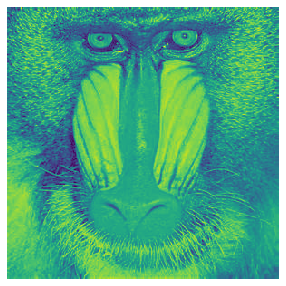

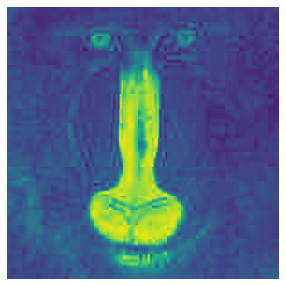

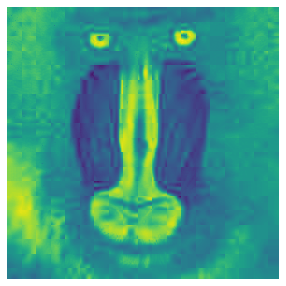

In [301]:
display(L_data)
display(A_data)
display(B_data)

2.6实现hsv_decomposition()函数，关于hsv的百度百科：HSV(Hue, Saturation, Value)是根据颜色的直观特性由A. R. Smith在1978年创建的一种颜色空间, 也称六角锥体模型(Hexcone Model)

In [306]:
def hsv_decomposition(orign_image_data,channel):
    HSV_data=sc.rgb2hsv(orign_image_data)
    if channel=="H":
        return HSV_data[:,:,0]
    if channel=="S":
        return HSV_data[:,:,1]
    if channel=="V":
        return HSV_data[:,:,2]
    else:
        return lab_data/256

In [308]:
H_data=hsv_decomposition(img_data1,"H")
S_data=hsv_decomposition(img_data1,"S")
V_data=hsv_decomposition(img_data1,"V")

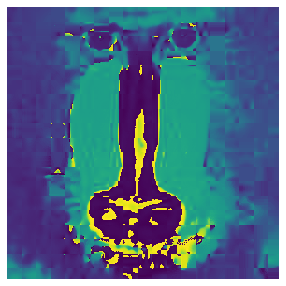

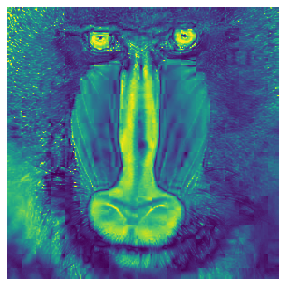

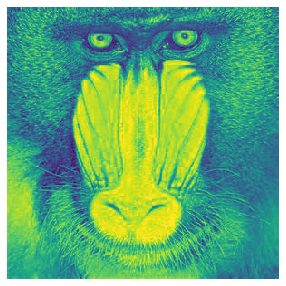

In [310]:
display(H_data)
display(S_data)
display(V_data)   ######怎么这么惊悚

2.7实现mix_images函数，混合两张照片

In [342]:
def mix_images(image1,image2,channel1="R",channel2="G"):
    img1=rgb_exclusion(image1,"R")
    img2=rgb_exclusion(image2,"G")
    img=img1.copy()
    img[:,150:,:]=img2[:,150:,:]
    display(img)
    return np.sum(img)

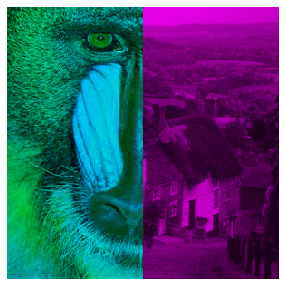

76123.4609375

In [343]:
mix_images(img_data1,img_data2)  ######好像结果差了一点，不过也不多

附加题：实现最后的附加题，四分之一图片聚合

In [363]:
def mix(image):
    img1=rgb_exclusion(image,"R")[:150,:150,:]
    img2=dim_image(image)[150:,:150,:]
    img3=(image**0.5)[150:,:150,:]
    img4=rgb_exclusion(image,"R")[150:,150:,:]
    mix_img=image.copy()
    mix_img[:150,:150,:]=img1
    mix_img[150:,:150,:]=img2
    mix_img[150:,:150,:]=img3
    mix_img[150:,150:,:]=img4
    display(mix_img)

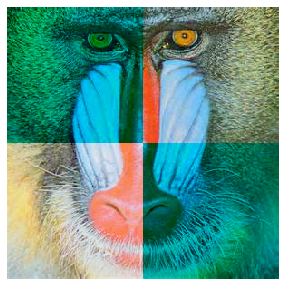

In [364]:
 mix(img_data1)

In [ ]:
###########终于完成了